In [2]:
%run ../__init__.py

In [2]:
%matplotlib inline

In [3]:
budget = pd.read_csv('../ipynb/school_budget_train.csv')

In [4]:
budget_df = pd.DataFrame(budget)

In [5]:
budget_df.columns = ['ID' if x=='Unnamed: 0' else x for x in budget_df.columns]

In [6]:
budget_df.shape

(400277, 26)

In [7]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 26 columns):
ID                        400277 non-null int64
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    179964 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE        

In [8]:
budget_df = budget_df.drop('ID', axis=1)

In [9]:
targets = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [10]:
predictors = [col for col in budget_df.columns if col not in targets]
word_predictors = ['Object_Description','Text_2','SubFund_Description','Job_Title_Description','Text_3','Text_4',
                   'Sub_Object_Description','Location_Description','Function_Description','Facility_or_Department','Position_Extra',
                   'Program_Description','Fund_Description','Text_1']

num_predictors = ['FTE', 'Total']

### Change label columns, append category names to labels

In [11]:
for col in budget_df[targets]:
    budget_df[col] = str(col)+'__'+ budget_df[col].astype(str)

In [12]:
budget_df[targets].head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
0,Function__Teacher Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__NO_LABEL,Position_Type__Teacher,Object_Type__NO_LABEL,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating
1,Function__NO_LABEL,Use__NO_LABEL,Sharing__NO_LABEL,Reporting__NO_LABEL,Student_Type__NO_LABEL,Position_Type__NO_LABEL,Object_Type__NO_LABEL,Pre_K__NO_LABEL,Operating_Status__Non-Operating
2,Function__Teacher Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Teacher,Object_Type__Base Salary/Compensation,Pre_K__Non PreK,Operating_Status__PreK-12 Operating
3,Function__Substitute Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Substitute,Object_Type__Benefits,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating
4,Function__Substitute Compensation,Use__Instruction,Sharing__School Reported,Reporting__School,Student_Type__Unspecified,Position_Type__Teacher,Object_Type__Substitute Compensation,Pre_K__NO_LABEL,Operating_Status__PreK-12 Operating


In [13]:
categorize_label = lambda x: x.astype('category')
budget_df[targets] = budget_df[targets].apply(categorize_label, axis=0)

### Find NaN and fill NaN values for text columns with empty strings

In [14]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].replace({"n/a": ''})

In [15]:
budget_df[targets].isnull().sum().sort_values()

Function            0
Use                 0
Sharing             0
Reporting           0
Student_Type        0
Position_Type       0
Object_Type         0
Pre_K               0
Operating_Status    0
dtype: int64

In [16]:
budget_df[predictors].isnull().sum().sort_values()

Total                       4555
Object_Description         24784
Function_Description       58082
SubFund_Description        93422
Program_Description        95617
Job_Title_Description     107534
Text_1                    107992
Position_Extra            135513
Fund_Description          197400
Text_3                    220313
Location_Description      238223
FTE                       274206
Sub_Object_Description    308674
Text_2                    312060
Facility_or_Department    346391
Text_4                    346531
dtype: int64

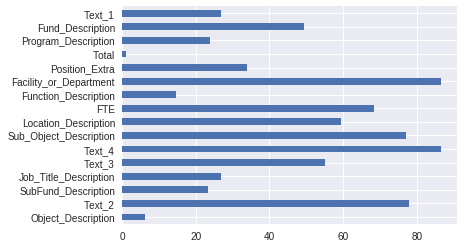

In [17]:
_ = (budget_df[predictors].isnull().sum()/budget_df[predictors].shape[0]*100).plot(kind='barh')

In [18]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[word_predictors].loc[:,[col]].fillna(' ')

In [19]:
budget_df[predictors].isnull().sum()

Object_Description             0
Text_2                         0
SubFund_Description            0
Job_Title_Description          0
Text_3                         0
Text_4                         0
Sub_Object_Description         0
Location_Description           0
FTE                       274206
Function_Description           0
Facility_or_Department         0
Position_Extra                 0
Total                       4555
Program_Description            0
Fund_Description               0
Text_1                         0
dtype: int64

In [20]:
budget_df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


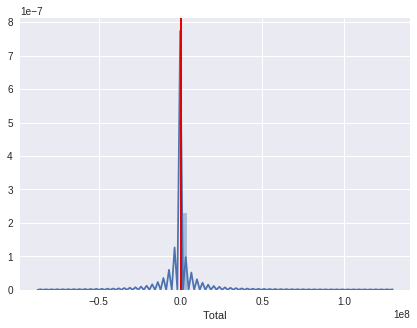

In [21]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_df['Total'].dropna())
plt.axvline(budget_df['Total'].median(), c='black')
plt.axvline(budget_df['Total'].mean(), c='red')

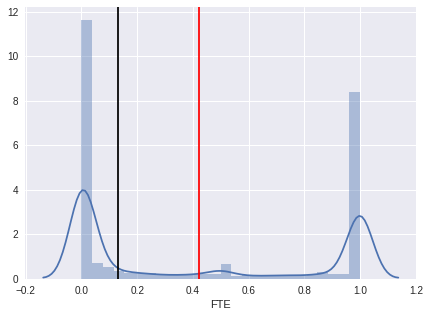

In [31]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_df['FTE'].dropna())
plt.axvline(budget_df['FTE'].median(), c='black')
plt.axvline(budget_df['FTE'].mean(), c='red')

In [28]:
mask_fte = (budget_df['FTE'] > 1) | (budget_df['FTE'] < 0)
print(mask_fte.sum())

3119


In [23]:
# all values less than 0 becomes 0 and values greater than 1 becomes 1
# values greater than 1 and less than 1 were incorrect and skewing the the mean, so clipped them
budget_df['FTE'] = np.clip(budget_df['FTE'],0,1)

In [36]:
budget_df['FTE'].mean()

0.42066301485217528

In [30]:
budget_df['FTE'].isnull().sum()

274206

In [35]:
budget_df['FTE'] = budget_df.loc[:,['FTE']].fillna(budget_df['FTE'].mean())

In [37]:
budget_df['Total'] = budget_df.loc[:,['Total']].fillna(budget_df['Total'].mean())

## Impute values for numerical columns

Fill 'Total' column with mean value since graph shows that values are normally distributed where mean and median are the same

## Data cleaning for word predictor columns

In [24]:
import re
from spacy.en import English
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
from spacy.en import STOP_WORDS
nlp = English()

In [25]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].str.lower()

In [26]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].replace({"n/a": ''})

In [27]:
def cleaner(text):
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = re.sub("\\s+", " ", text)
    text = ' '.join(i.lemma_ for i in nlp(text)
                    if i.orth_ not in STOP_WORDS)
    return text

In [28]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].apply(cleaner)
    print(col)

Object_Description
Text_2
SubFund_Description
Job_Title_Description
Text_3
Text_4
Sub_Object_Description
Location_Description
Function_Description
Facility_or_Department
Position_Extra
Program_Description
Fund_Description
Text_1


In [38]:
unique_values = []
for col in budget_df[word_predictors]:
    unique_vals = budget_df[col].nunique()
    unique_values.append({'column_name': col,
                        'unique_vals': unique_vals})

In [39]:
pd.DataFrame(unique_values)

,column_name,unique_vals
0,Object_Description,537
1,Text_2,277
2,SubFund_Description,266
3,Job_Title_Description,3127
4,Text_3,35
5,Text_4,236
6,Sub_Object_Description,161
7,Location_Description,343
8,Function_Description,627
9,Facility_or_Department,173


In [40]:
budget_df['combined_text'] = budget_df[word_predictors].apply(lambda x: " ".join(x), axis=1)

In [36]:
def value_counts(col):
    counts = budget_df[col].value_counts()
    percent = budget_df[col].value_counts(normalize=True)
    return pd.DataFrame({'counts': counts, 
                         'percent': percent})

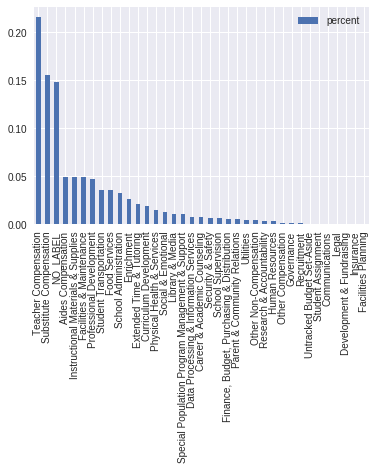

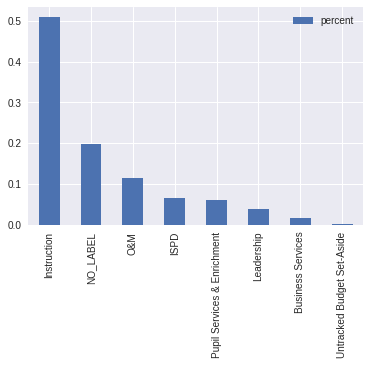

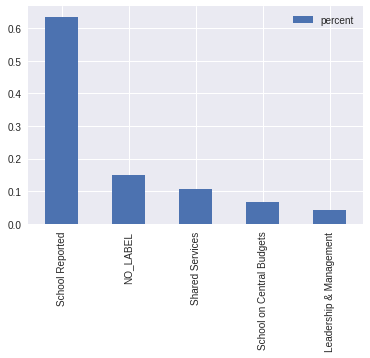

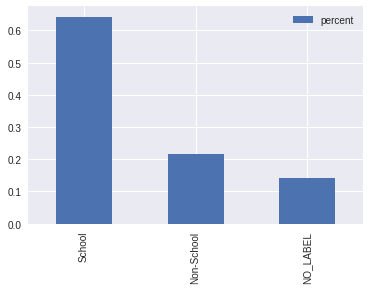

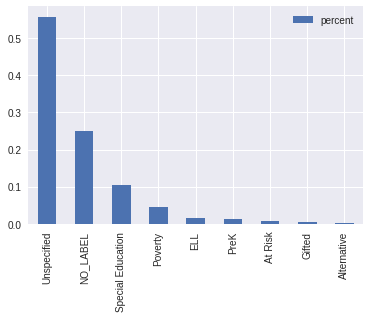

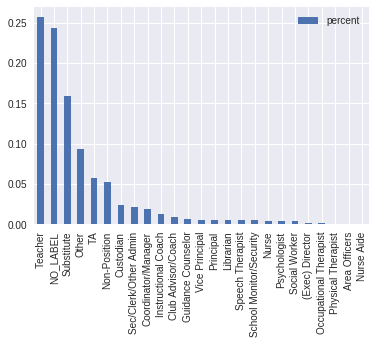

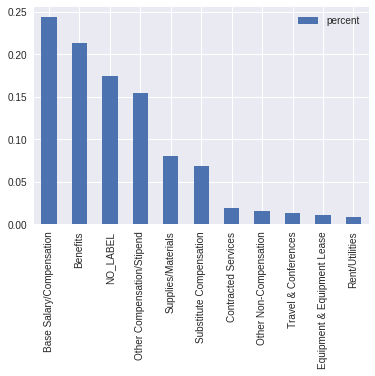

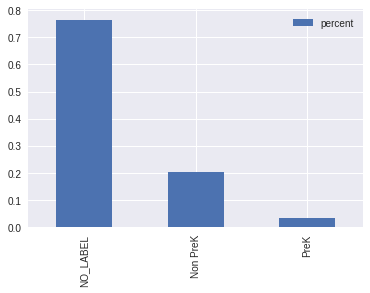

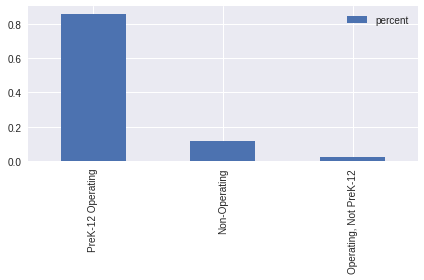

In [37]:
for i, col in enumerate(budget_df[targets]):
    col = value_counts(col)
    col[['percent']].plot.bar()
    
plt.tight_layout()

In [44]:
budget_df.to_csv('../ipynb/train_cleaned.csv')